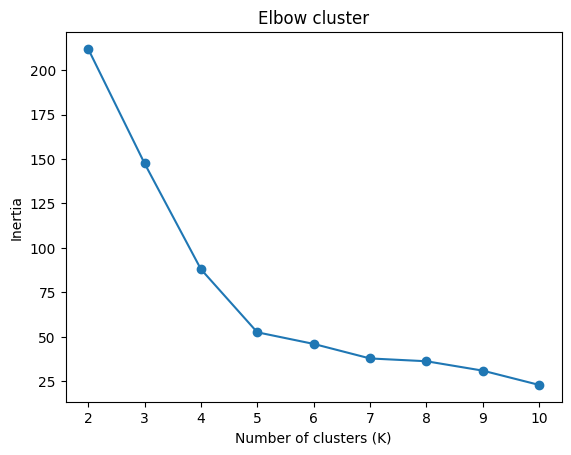

K=2, Silhouette Score=0.3321
K=3, Silhouette Score=0.4025
K=4, Silhouette Score=0.4932
K=5, Silhouette Score=0.5530
K=6, Silhouette Score=0.4667
K=7, Silhouette Score=0.4651
K=8, Silhouette Score=0.4113
K=9, Silhouette Score=0.4344
K=10, Silhouette Score=0.4416

Final Train Silhouette Score: 0.5530
Final Test Silhouette Score: 0.5668


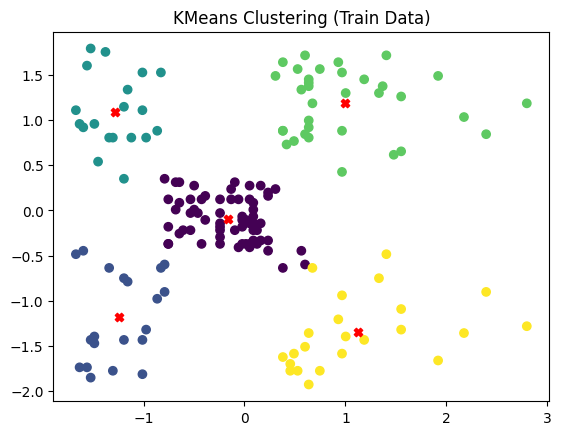

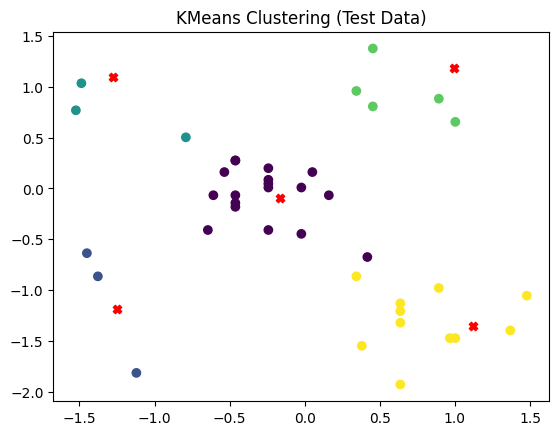

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import silhouette_score

# 데이터 로드
df = pd.read_csv('20260115_141658_mall_customers.csv')

# 데이터 전처리
# Annual Income (k$),Spending Score (1-100) 컬럼 선택
data = df[['Annual Income (k$)', 'Spending Score (1-100)']]

# 8 : 2 비율로 train, test 데이터 분리
X_train, X_test = train_test_split(data, test_size=0.2, random_state=42)

# 표준화
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# 엘보우 기법으로 K값 및 실루엣 점수 구하기
# key : 클러스터 개수, value : [inertia, silhouette score]
result = {}
k_range = range(2, 11)

for k in k_range:
    kmeans_temp = KMeans(n_clusters=k, random_state=42)
    kmeans_temp.fit_predict(X_train_scaled)
    sil_avg = silhouette_score(X_train_scaled, kmeans_temp.labels_)
    result[k] = [kmeans_temp.inertia_]
    result[k].append(sil_avg)


# 클러스터 시각화 하기
plt.plot(k_range, [v[0] for v in result.values()], marker='o')
plt.title('Elbow cluster')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Inertia')
plt.xticks(k_range)
plt.show()

# 실루엣 점수 확인
for k, v in result.items():
    print(f'K={k}, Silhouette Score={v[1]:.4f}')


k = 5  # 최적의 K값 선택 / 5 이후로 inertia 기울기가 일정하게 감소함 즉 가성비 좋은 K 값 / 데이터 양이 많지 않아 너무 많은 클러스트는 오히려 독이 됨
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(X_train_scaled)

train_labels = kmeans.labels_
test_labels = kmeans.predict(X_test_scaled)

# 최종 실루엣 값
train_silhouette = silhouette_score(X_train_scaled, train_labels)
test_silhouette = silhouette_score(X_test_scaled, test_labels)
print(f'\nFinal Train Silhouette Score: {train_silhouette:.4f}')
print(f'Final Test Silhouette Score: {test_silhouette:.4f}')

# 학습/테스트 데이터 산점도 시각화
plt.scatter(X_train_scaled[:, 0], X_train_scaled[:, 1], c=train_labels, cmap='viridis')
plt.scatter(
    kmeans.cluster_centers_[:, 0], 
    kmeans.cluster_centers_[:, 1], 
    c='red',
    marker='X'
)
plt.title('KMeans Clustering (Train Data)')
plt.show()


plt.scatter(X_test_scaled[:, 0], X_test_scaled[:, 1], c=test_labels, cmap='viridis')
plt.scatter(
    kmeans.cluster_centers_[:, 0], 
    kmeans.cluster_centers_[:, 1], 
    c='red',
    marker='X'
)
plt.title('KMeans Clustering (Test Data)')
plt.show()



각 클러스터 “보고서용” 특징/전략 문장

C1 (고소득·고지출 / 19.5%)  
핵심 매출군(VIP). 고가/프리미엄 추천, 멤버십·리워드 강화, 신제품 선공개 같은 락인 전략이 효율적.

C3 (고소득·저지출 / 17.5%)  
구매력은 높은데 지출이 낮은 잠재 VIP. 관심 카테고리 발굴(개인화 추천), 번들/체험/한정 혜택으로 전환(업셀)을 노리기 좋음.

C2 (저소득·고지출 / 11.0%)  
지출 성향은 높지만 소득은 낮은 프로모션 반응형/충동구매형 가능성. 쿠폰/세일/포인트 같은 가격 자극에 반응할 확률이 큼.

C4 (저소득·저지출 / 11.5%)  
전반적으로 관여도가 낮은 저가치·저활성 군. 유지비용을 낮추고(저비용 채널), 기본 혜택·온보딩으로 이탈 방지/저비용 리텐션 중심.

C0 (중간형·일반 고객군 / 40.5%)  
평균 근처에 많이 분포하는 대중 군집. 베스트셀러 추천/시즌 캠페인 등 범용 마케팅에 적합, 세부 타깃은 추가 피처(나이/성별/구매이력)로 더 쪼갤 여지.